## Observations and Insights 

In [1]:
# %matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Drop duplicates rows (5 rows were dropped)
clean_results = study_results.groupby(["Mouse ID", "Timepoint"]).mean()
clean_results

# The group function changes the index to both "Mouse ID" and "Timepoint"
# This removes the indexes to create a "flat" index df
flat_index = clean_results.reset_index()

# Combine the data into a single dataset
merge_data = pd.merge(mouse_metadata, flat_index, how="left", on=["Mouse ID"])

# Display the data table for preview
merge_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0.0
1,k403,Ramicane,Male,21,16,5,38.825898,0.0
2,k403,Ramicane,Male,21,16,10,35.014271,1.0
3,k403,Ramicane,Male,21,16,15,34.223992,1.0
4,k403,Ramicane,Male,21,16,20,32.997729,1.0


## Summary Statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for 
# each regimen

# Drop the unnecessary columns
trim_df = merge_data[["Drug Regimen", "Tumor Volume (mm3)"]]

# Adapted from Pandas documentation on the DataFrameGroupBy.agg function
summary_stats = trim_df.groupby("Drug Regimen").agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.388228  50.833737  43.163594  6.569901  0.526013
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [4]:
# ---------------------- DELETE THIS ------------------------
# Uncleaned Data Stats - 5 additional rows
data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])
# data = data[["Drug Regimen", "Tumor Volume (mm3)"]]
# stats = data.groupby("Drug Regimen").agg(['mean', 'median', 'var', 'std', 'sem'])
# stats
d37 = data[["Drug Regimen", "Sex"]]
d37 = data.groupby("Sex")#.value_counts()
data["Sex"].value_counts(normalize=True)

Male      0.506075
Female    0.493925
Name: Sex, dtype: float64

## Bar and Pie Charts

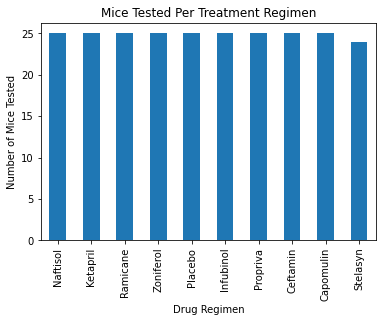

In [5]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.

# Get the relevant information
mice_df = merge_data.groupby(["Mouse ID", "Drug Regimen"]).mean().reset_index()

# Chart setup
mice_plot = mice_df["Drug Regimen"].value_counts().plot.bar().set(xlabel="Drug Regimen", 
                ylabel="Number of Mice Tested", title="Mice Tested Per Treatment Regimen")

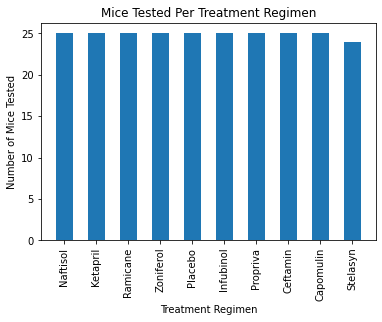

In [6]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Get the relevant information by putting each axis into a list
y_axis = mice_df["Drug Regimen"].value_counts().tolist()
x_axis = mice_df["Drug Regimen"].value_counts().index.tolist()

# Define chart title and axis labels
plt.title("Mice Tested Per Treatment Regimen")
plt.xlabel("Treatment Regimen")
plt.ylabel("Number of Mice Tested")

# Generate the chart and format it
plt.bar(x_axis, y_axis, width=0.52)
plt.xticks(rotation=90)
plt.show()

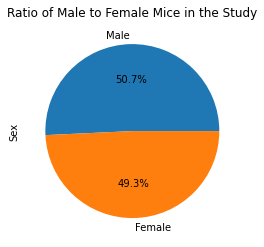

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Get the relevant data for the chart
mice_sex = merge_data[["Mouse ID", "Sex"]]
mice_sex.groupby("Sex")
mice_sex["Sex"].value_counts()

# Generate the chart and format it
mice_sex["Sex"].value_counts().plot.pie(autopct='%1.1f%%',title="Ratio of Male to Female Mice in the Study")

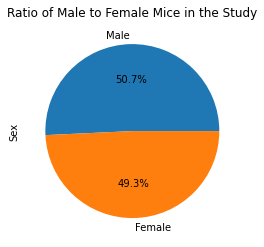

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Get the relevant information by putting each axis into a list
y_axis = mice_sex["Sex"].value_counts().tolist()
x_axis = mice_sex["Sex"].value_counts().index.tolist()

# Define chart title and axis labels
plt.title("Ratio of Male to Female Mice in the Study")
plt.ylabel("Sex")

# Generate the chart and format it
plt.pie(y_axis, labels=x_axis, autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [9]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_data = merge_data.loc[merge_data["Timepoint"] == 45]
treatment_data = treatment_data.loc[(treatment_data["Drug Regimen"] == "Capomulin") | 
                                   (treatment_data["Drug Regimen"] == "Ramicane") |
                                   (treatment_data["Drug Regimen"] == "Infubinol") |
                                   (treatment_data["Drug Regimen"] == "Ceftamin")
                                   ]
treatment_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1.0
19,s185,Capomulin,Female,3,17,45,23.343598,1.0
29,x401,Capomulin,Female,16,15,45,28.484033,0.0
39,m601,Capomulin,Male,22,17,45,28.430964,1.0
49,g791,Ramicane,Male,11,16,45,29.128472,1.0
...,...,...,...,...,...,...,...,...
1792,x822,Ceftamin,Male,3,29,45,61.386660,3.0
1808,y163,Infubinol,Female,17,27,45,67.685569,3.0
1840,y769,Ceftamin,Female,6,27,45,68.594745,4.0
1850,y865,Ceftamin,Male,23,26,45,64.729837,3.0


In [10]:
# Convert the Drug Regimen series from the DataFrame to a list
treatment_list = treatment_data["Drug Regimen"].tolist()

# Get a list that holds unique treatment names
unique_treatments = treatment_data["Drug Regimen"].unique().tolist()

# Convert the tumor volume series from the DataFrame to a list
tumor_list = treatment_data["Tumor Volume (mm3)"].tolist()

# Create empty list for each treatment to hold with tumor vol data (for plotting)
ramicane = []
capomulin = []
infubinol = []
ceftamin = []

# Create for loop iterator
i = 0

# Can you make this work as a list comprehension? I tried to do it against the DataFrame, but couldn't work out the syntax.
# Loop through the treatment list and assign the tumor data to the respective treatment lists
for x in treatment_list:
    if unique_treatments[0] == treatment_list[i]:
        ramicane.append(tumor_list[i])
        i = i + 1
    elif unique_treatments[1] == treatment_list[i]:
        capomulin.append(tumor_list[i])
        i = i + 1
    elif unique_treatments[2] == treatment_list[i]:
        infubinol.append(tumor_list[i])
        i = i + 1
    elif unique_treatments[3] == treatment_list[i]:
        ceftamin.append(tumor_list[i])
        i = i + 1

In [11]:
# Ramicane quartiles
quartiles = np.quantile(ramicane, [.25,.5,.75])
iqr = quartiles[2] - quartiles[0]
lower_bound = quartiles[0] - (1.5 * iqr)
upper_bound = quartiles[2] + (1.5 * iqr)
print(f"Values below {lower_bound} for Ramicane could be outliers.")
print(f"Values above {upper_bound} for Ramicane could be outliers.")

# Capomulin quartiles
quartiles = np.quantile(capomulin, [.25,.5,.75])
iqr = quartiles[2] - quartiles[0]
lower_bound = quartiles[0] - (1.5 * iqr)
upper_bound = quartiles[2] + (1.5 * iqr)
print(f"Values below {lower_bound} for Capomulin could be outliers.")
print(f"Values above {upper_bound} for Capomulin could be outliers.")

# Infubinol quartiles
quartiles = np.quantile(infubinol, [.25,.5,.75])
iqr = quartiles[2] - quartiles[0]
lower_bound = quartiles[0] - (1.5 * iqr)
upper_bound = quartiles[2] + (1.5 * iqr)
print(f"Values below {lower_bound} for Infubinol could be outliers.")
print(f"Values above {upper_bound} for Infubinol could be outliers.")

# Ceftamin quartiles
quartiles = np.quantile(ceftamin, [.25,.5,.75])
iqr = quartiles[2] - quartiles[0]
lower_bound = quartiles[0] - (1.5 * iqr)
upper_bound = quartiles[2] + (1.5 * iqr)
print(f"Values below {lower_bound} for Ceftamin could be outliers.")
print(f"Values above {upper_bound} for Ceftamin could be outliers.")

Values below 19.690480101250003 for Ramicane could be outliers.
Values above 49.79900043124999 for Ramicane could be outliers.
Values below 20.70456164999999 for Capomulin could be outliers.
Values above 51.83201549 for Capomulin could be outliers.
Values below 55.35777559500001 for Infubinol could be outliers.
Values above 75.08224443499999 for Infubinol could be outliers.
Values below 52.29350701999999 for Ceftamin could be outliers.
Values above 76.66786758 for Ceftamin could be outliers.


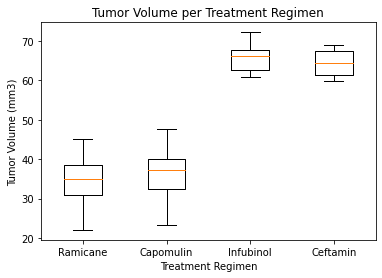

In [12]:
# Boxplots
fig1, tumor_plt = plt.subplots()
tumor_plt.set_xlabel("Treatment Regimen")
tumor_plt.set_ylabel("Tumor Volume (mm3)")
tumor_plt.set_title("Tumor Volume per Treatment Regimen")
tumor_plt.boxplot([ramicane, capomulin, infubinol, ceftamin], labels=unique_treatments)
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
